In [1]:
#Importando pacotes necessários para as análises
import numpy as np  #Numpy e Pandas para
import pandas as pd #análises de dataframes
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt #Matplotlib e, eventualmente,
import seaborn as sns           #Seaborn para visualização
!pip install --pre astroquery
from astroquery.vizier import Vizier #Vizier para o carregamento do catálogo a ser analisado

In [2]:
#A fim de manter o código independente de arquivos externos, carregarei a tabela diretamente no projeto:
v = Vizier(catalog='J/A+A/659/A40/catalog1',
           columns=['_RA','_DE',
                    'z','Re',
                    'Ve','Vopt','Vout', 'Mstar',
                    'MHI','MH2'])
v.ROW_LIMIT = -1

In [3]:
data = v.query_constraints(z="0..2.0")[0]
data = data.to_pandas()

In [4]:
data.head() #Visualização inicial da tabela obtida

,_RA,_DE,z,Re,Ve,Vopt,Vout,Mstar,MHI,MH2
0,150.14436,2.24157,0.845449,2.129356,49.28188,58.34788,72.84826,4.140280e+09,8.115360e+10,2.275870e+09
1,150.25717,1.86422,0.833362,3.495298,129.28829,161.60777,167.48763,7.962150e+09,6.346460e+10,2.938690e+09
2,150.25927,2.32429,0.842185,2.615322,64.69055,108.34017,133.64060,4.295670e+09,6.537590e+10,1.877240e+09
3,150.27355,1.88270,0.837601,4.604157,219.45462,215.27648,222.90006,1.069130e+10,4.458460e+10,2.633400e+09
4,150.29337,1.88582,0.839406,4.431997,118.79078,114.90277,131.22659,2.254400e+09,7.567250e+10,1.290850e+09


In [5]:
data.corr() #Para uma visualização rápida das correlações

,_RA,_DE,z,Re,Ve,Vopt,Vout,Mstar,MHI,MH2
_RA,1.000000,0.554158,-0.222992,-0.040094,0.019210,0.003124,-0.003230,0.056950,-0.101541,-0.106833
_DE,0.554158,1.000000,-0.147620,0.036694,0.017954,0.072226,0.084939,-0.107703,0.072861,-0.103992
z,-0.222992,-0.147620,1.000000,0.167398,0.103654,0.061038,0.074251,0.234096,-0.121673,0.391257
Re,-0.040094,0.036694,0.167398,1.000000,0.016064,0.089049,0.095474,0.029405,-0.150566,-0.011605
Ve,0.019210,0.017954,0.103654,0.016064,1.000000,0.854976,0.696377,0.483731,-0.238872,0.467629
Vopt,0.003124,0.072226,0.061038,0.089049,0.854976,1.000000,0.843382,0.487747,-0.260021,0.475431
Vout,-0.003230,0.084939,0.074251,0.095474,0.696377,0.843382,1.000000,0.441042,-0.260540,0.416659
Mstar,0.056950,-0.107703,0.234096,0.029405,0.483731,0.487747,0.441042,1.000000,-0.574493,0.662071
MHI,-0.101541,0.072861,-0.121673,-0.150566,-0.238872,-0.260021,-0.260540,-0.574493,1.000000,-0.110590
MH2,-0.106833,-0.103992,0.391257,-0.011605,0.467629,0.475431,0.416659,0.662071,-0.110590,1.000000


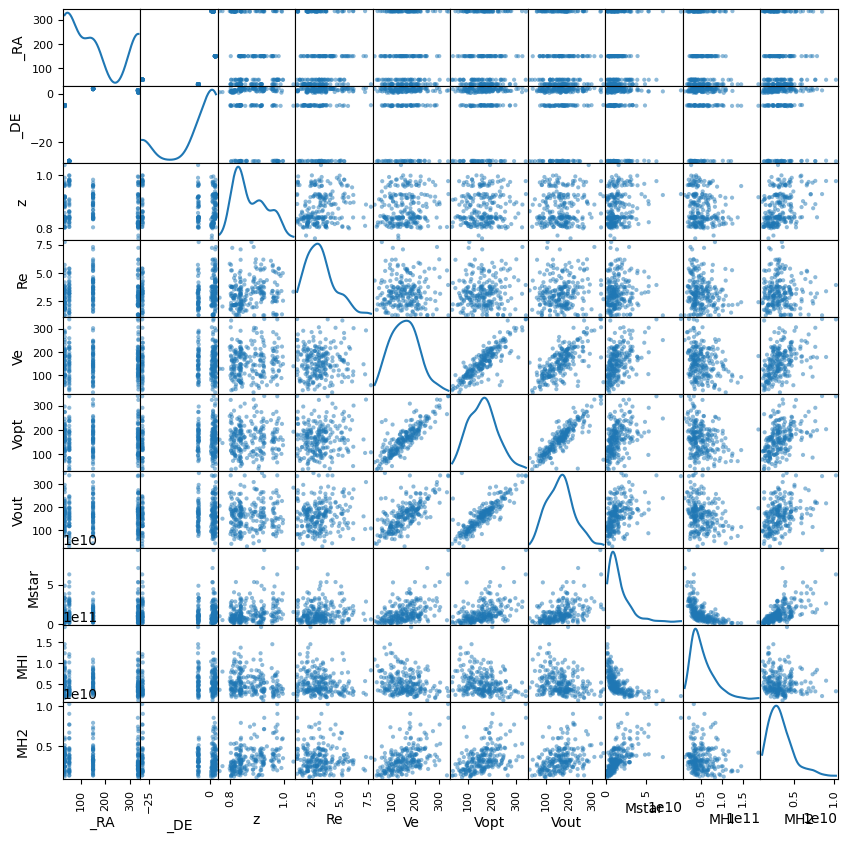

In [6]:
#data.corr() nos mostra que não há, a princípio, uma correlação forte entre as velocidades Ve, Vopt e Vout ou as massas Mstar, MHI e MH2 com o redshift.
#Para podermos visualizar melhor, eis o plot:
scatter_matrix(data,  diagonal='kde',alpha=0.5, figsize=(10, 10))
plt.show()

###Através dos gráficos podemos ver que existem 4 regiões separadas do céu neste levantamento. Isso não nos traz muita informação, já que é esperado que as galáxias sejam independentes entre si de qualquer maneira.

###Também podemos ver que, de fato, a correlação entre as velocidades Ve, Vopt e Vout com o redshift (z) é muito baixa, sendo 0.103654 a maior delas.

###As massas estelares e de gases também não aparentam ter uma alta correlação com o redshift.

###Por outro lado, podemos ver uma clara correlação, aparentemente linear, entre as velocidades (Ve x Vopt, Ve x Vout, Vout x Vopt). Essas são as velocidades de rotação da galáxia no seu raio efetivo (Ve), no seu raio ótico (Vopt) e no seu raio externo (Vout) (1.5 x raio ótico.
###De acordo com as modelagens de galáxias utilizando a massa visível total, a curva de rotação galáctica deveria seguir decrescendo conforme a distância ao centro galáctico, mas a correlação encontrada sugere que não é isto que acontece.